# The goal for this project was to use time-series and geoaspatial analysis to study the effects of alcohol usage on car crashes in North Carolina.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime
import geopandas as gpd

In [2]:
# Set columns display width to unlimited
pd.set_option('display.max_columns', None)

In [3]:
# Import Persons Involved data and view data sample
persons = pd.read_csv('Persons_Involved_in_Crashes.csv')
persons.head()

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
0,122020,1,ORISKANY,NaN,NaN,NaN,No,59.0,NaN,NaN,NaN,NaN,No ON-OFF switch,No Air Bag(s),Not ejected,Male,White,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Pickup,2015/01/04 23:27:00+00
1,122020,2,ORISKANY,NaN,NaN,NaN,No,54.0,NaN,NaN,NaN,NaN,No ON-OFF switch,No Air Bag(s),Not ejected,Female,White,No injury,Lap belt only,No,Passenger,NaN,NaN,NaN,NaN,Pickup,2015/01/04 23:27:00+00
2,122020,3,RALEIGH,C,0,NC,No,34.0,No,No,No test,No test,No ON-OFF switch,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,NaN,NaN,Passenger car,2015/01/04 23:27:00+00
3,122020,4,KENTWOOD,NaN,NaN,NaN,No,65.0,NaN,NaN,NaN,NaN,No ON-OFF switch,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2015/01/04 23:27:00+00
4,122021,5,CARY,C,0,NC,No,22.0,No,No,No test,No test,No ON-OFF switch,Not deployed,Not ejected,Male,White,No injury,Shoulder and lap belt,No,Driver,None,Failure to reduce speed,NaN,NaN,Passenger car,2015/01/05 00:23:00+00


In [4]:
persons.shape

(524128, 27)

In [5]:
persons.dtypes

key_crash                      int64
OBJECTID                       int64
City                          object
DLClass                       object
DLRestrictions                object
DLState                       object
CDL                           object
Age                          float64
VehicleSeizure                object
AlcoholSuspected              object
AlcoholTest                   object
AlcoholResultType             object
AirbagSwitch                  object
AirbagDeployed                object
Ejection                      object
Gender                        object
Race                          object
Injury                        object
Protection                    object
Trapped                       object
PersonType                    object
VisionObstruction             object
ContributingCircumstance1     object
ContributingCircumstance2     object
ContributingCircumstance3     object
VehicleType                   object
crash_date                    object
d

In [6]:
persons.isnull().sum()

key_crash                         0
OBJECTID                          0
City                          62158
DLClass                      197612
DLRestrictions               203263
DLState                      174249
CDL                               0
Age                           61703
VehicleSeizure               136832
AlcoholSuspected             158370
AlcoholTest                  158834
AlcoholResultType            158888
AirbagSwitch                  46952
AirbagDeployed                45737
Ejection                      47548
Gender                        57979
Race                          58246
Injury                        46667
Protection                    47684
Trapped                       47531
PersonType                        3
VisionObstruction            158135
ContributingCircumstance1    135145
ContributingCircumstance2    495643
ContributingCircumstance3    520632
VehicleType                    6268
crash_date                        0
dtype: int64

In [7]:
persons.value_counts('key_crash', dropna=False)

key_crash
194209    90
319228    64
166983    64
166461    58
280469    56
          ..
273725     1
145859     1
145861     1
256193     1
317883     1
Length: 207728, dtype: int64

In [8]:
persons.value_counts('crash_date', dropna=False)

crash_date
2017/11/16 14:52:00+00    90
2016/10/24 14:31:00+00    69
2023/05/10 16:54:00+00    64
2016/10/13 20:50:00+00    58
2021/08/11 17:01:00+00    56
                          ..
2017/02/20 12:00:00+00     1
2017/02/20 00:18:00+00     1
2017/02/19 20:55:00+00     1
2018/04/09 01:50:00+00     1
2022/11/23 00:10:00+00     1
Length: 200056, dtype: int64

In [9]:
persons.value_counts(['key_crash', 'crash_date'], dropna=False)

key_crash  crash_date            
194209     2017/11/16 14:52:00+00    90
166983     2016/10/24 14:31:00+00    64
319228     2023/05/10 16:54:00+00    64
166461     2016/10/13 20:50:00+00    58
280469     2021/08/11 17:01:00+00    56
                                     ..
273725     2021/04/19 01:30:00+00     1
202181     2018/03/15 19:46:00+00     1
145859     2015/12/23 11:52:00+00     1
145861     2015/12/23 18:23:00+00     1
189581     2017/09/16 03:04:00+00     1
Length: 207731, dtype: int64

In [10]:
# Fix specific key_crash dates that were later determined to have two different datetime values for the same key_crash
persons.loc[persons['key_crash'] == 252891]

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
335426,252891,335458,DULUTH,C,NaN,GA,No,54.0,No,No,No test,No test,Unknown pos. in vehicle,Not deployed,Not ejected,Male,Asian,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335427,252891,335459,FLUSHING,NaN,NaN,NaN,No,50.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,No Air Bag(s),Not ejected,Male,Asian,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335428,252891,335460,AIKENS,NaN,NaN,NaN,No,39.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Male,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335429,252891,335461,SANFORD,NaN,NaN,NaN,No,39.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335430,252891,335462,ROOSEVELT,NaN,NaN,NaN,No,42.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335431,252891,335463,BROOKLYN,NaN,NaN,NaN,No,50.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335432,252891,335464,BRONX,NaN,NaN,NaN,No,52.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335433,252891,335465,COLOMBIA,NaN,NaN,NaN,No,21.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335434,252891,335466,COLOMBIA,NaN,NaN,NaN,No,32.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Male,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335435,252891,335467,BROOKLYN,NaN,NaN,NaN,No,43.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00


In [11]:
persons.loc[360888, 'crash_date'] = '2020/02/22 12:54:00+00'

In [12]:
persons.loc[persons['key_crash'] == 252891]

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
335426,252891,335458,DULUTH,C,NaN,GA,No,54.0,No,No,No test,No test,Unknown pos. in vehicle,Not deployed,Not ejected,Male,Asian,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335427,252891,335459,FLUSHING,NaN,NaN,NaN,No,50.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,No Air Bag(s),Not ejected,Male,Asian,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335428,252891,335460,AIKENS,NaN,NaN,NaN,No,39.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Male,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335429,252891,335461,SANFORD,NaN,NaN,NaN,No,39.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335430,252891,335462,ROOSEVELT,NaN,NaN,NaN,No,42.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335431,252891,335463,BROOKLYN,NaN,NaN,NaN,No,50.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335432,252891,335464,BRONX,NaN,NaN,NaN,No,52.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335433,252891,335465,COLOMBIA,NaN,NaN,NaN,No,21.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335434,252891,335466,COLOMBIA,NaN,NaN,NaN,No,32.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Male,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00
335435,252891,335467,BROOKLYN,NaN,NaN,NaN,No,43.0,NaN,NaN,NaN,NaN,Unknown pos. in vehicle,Not deployed,Not ejected,Unknown,Unknown,No injury,None used,No,Passenger,NaN,NaN,NaN,NaN,Activity bus,2020/02/22 12:54:00+00


In [13]:
persons.loc[persons['key_crash'] == 199700]

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
200182,199700,200186,ROCKY MOUNT,C,1,NC,No,49.0,No,No,No test,No test,Unknown if switch present,Deployed front,Not ejected,Female,Black,No injury,Shoulder and lap belt,No,Driver,None,Improper lane change,NaN,NaN,Passenger car,2018/02/06 16:23:00+00
200183,199700,200187,ROCKY MOUNT,NaN,NaN,NaN,No,49.0,NaN,NaN,NaN,NaN,Unknown if switch present,Not deployed,Not ejected,Female,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2018/02/06 21:23:00+00
200184,199700,200188,GARNER,C,0,NC,No,25.0,No,No,No test,No test,Unknown if switch present,Not deployed,Not ejected,Female,Black,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,NaN,NaN,Passenger car,2018/02/06 16:23:00+00
200185,199700,200189,RALEIGH,NaN,NaN,NaN,No,44.0,NaN,NaN,NaN,NaN,Unknown if switch present,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2018/02/06 16:23:00+00


In [14]:
persons.loc[200183, 'crash_date'] = '2018/02/06 16:23:00+00'

In [15]:
persons.loc[persons['key_crash'] == 199700]

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
200182,199700,200186,ROCKY MOUNT,C,1,NC,No,49.0,No,No,No test,No test,Unknown if switch present,Deployed front,Not ejected,Female,Black,No injury,Shoulder and lap belt,No,Driver,None,Improper lane change,NaN,NaN,Passenger car,2018/02/06 16:23:00+00
200183,199700,200187,ROCKY MOUNT,NaN,NaN,NaN,No,49.0,NaN,NaN,NaN,NaN,Unknown if switch present,Not deployed,Not ejected,Female,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2018/02/06 16:23:00+00
200184,199700,200188,GARNER,C,0,NC,No,25.0,No,No,No test,No test,Unknown if switch present,Not deployed,Not ejected,Female,Black,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,NaN,NaN,Passenger car,2018/02/06 16:23:00+00
200185,199700,200189,RALEIGH,NaN,NaN,NaN,No,44.0,NaN,NaN,NaN,NaN,Unknown if switch present,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2018/02/06 16:23:00+00


In [16]:
persons.loc[persons['key_crash'] == 254711]

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
340724,254711,340860,RALEIGH,NaN,NaN,NC,No,22.0,No,"Yes - alcohol, impairment suspected",Alcohol test,Pending,Unknown if switch present,Deployed front,Not ejected,Male,Hispanic,C type injury (possible),Shoulder and lap belt,No,Driver,None,Crossed centerline/going wrong way,Alcohol use,"Operated vehicle in erratic, reckless, careles...",Passenger car,2020/03/16 05:27:00+00
340725,254711,340861,RALEIGH,C,0,NC,No,55.0,No,No,No test,No test,Unknown if switch present,Deployed front,Not ejected,Male,Hispanic,A type injury (disabling),Shoulder and lap belt,Yes,Driver,None,No contributing circumstances indicated,NaN,NaN,Sport utility,2020/03/16 05:27:00+00
340932,254711,341068,RALEIGH,NaN,NaN,NaN,No,62.0,NaN,NaN,NaN,NaN,Unknown if switch present,Deployed front,Not ejected,Female,Black,A type injury (disabling),Shoulder and lap belt,Yes,Passenger,NaN,NaN,NaN,NaN,Sport utility,2020/03/16 05:27:00+00
360903,254711,363690,RALEIGH,NaN,NaN,NaN,No,39.0,NaN,NaN,NaN,NaN,Unknown if switch present,Deployed front,Not ejected,Male,Hispanic,B type injury (evident),Unable to determine,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2020/03/15 22:55:00+00


In [17]:
persons.loc[360903, 'crash_date'] = '2020/03/16 05:27:00+00'

In [18]:
persons.loc[persons['key_crash'] == 254711]

,key_crash,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,crash_date
340724,254711,340860,RALEIGH,NaN,NaN,NC,No,22.0,No,"Yes - alcohol, impairment suspected",Alcohol test,Pending,Unknown if switch present,Deployed front,Not ejected,Male,Hispanic,C type injury (possible),Shoulder and lap belt,No,Driver,None,Crossed centerline/going wrong way,Alcohol use,"Operated vehicle in erratic, reckless, careles...",Passenger car,2020/03/16 05:27:00+00
340725,254711,340861,RALEIGH,C,0,NC,No,55.0,No,No,No test,No test,Unknown if switch present,Deployed front,Not ejected,Male,Hispanic,A type injury (disabling),Shoulder and lap belt,Yes,Driver,None,No contributing circumstances indicated,NaN,NaN,Sport utility,2020/03/16 05:27:00+00
340932,254711,341068,RALEIGH,NaN,NaN,NaN,No,62.0,NaN,NaN,NaN,NaN,Unknown if switch present,Deployed front,Not ejected,Female,Black,A type injury (disabling),Shoulder and lap belt,Yes,Passenger,NaN,NaN,NaN,NaN,Sport utility,2020/03/16 05:27:00+00
360903,254711,363690,RALEIGH,NaN,NaN,NaN,No,39.0,NaN,NaN,NaN,NaN,Unknown if switch present,Deployed front,Not ejected,Male,Hispanic,B type injury (evident),Unable to determine,No,Passenger,NaN,NaN,NaN,NaN,Passenger car,2020/03/16 05:27:00+00


In [19]:
# View value counts for AlcoholResultType
persons.value_counts('AlcoholResultType', dropna=False)

AlcoholResultType
No test                         361032
NaN                             158888
Alcohol (percent BAC)             2010
Pending                           1319
Unknown                            782
No alcohol or other drugs           63
Other drugs reported                32
Contaminated sample/unusable         2
dtype: int64

In [20]:
# Replace NaN values in AlcoholResultType variable
persons.AlcoholResultType.replace({np.nan : 'Unknown'}, inplace=True)
persons.value_counts('AlcoholResultType', dropna=False)

AlcoholResultType
No test                         361032
Unknown                         159670
Alcohol (percent BAC)             2010
Pending                           1319
No alcohol or other drugs           63
Other drugs reported                32
Contaminated sample/unusable         2
dtype: int64

In [21]:
# View value counts for ContributingCircumstance1
persons.value_counts('ContributingCircumstance1', dropna=False)

ContributingCircumstance1
No contributing circumstances indicated                                               180147
NaN                                                                                   135145
Failure to reduce speed                                                                59101
Inattention                                                                            24695
Failed to yield right of way                                                           22683
Improper backing                                                                       18424
Unable to determine                                                                    16453
Improper lane change                                                                   12985
Improper turn                                                                           8309
Improper parking                                                                        5641
Disregarded traffic signals                 

In [22]:
# Replace NaN values in ContributingCircumstance1 variable
persons.ContributingCircumstance1.replace({np.nan : 'No contributing circumstances indicated'}, inplace=True)
persons.value_counts('ContributingCircumstance1', dropna=False)

ContributingCircumstance1
No contributing circumstances indicated                                               315292
Failure to reduce speed                                                                59101
Inattention                                                                            24695
Failed to yield right of way                                                           22683
Improper backing                                                                       18424
Unable to determine                                                                    16453
Improper lane change                                                                   12985
Improper turn                                                                           8309
Improper parking                                                                        5641
Disregarded traffic signals                                                             5450
Exceeded safe speed for conditions          

In [23]:
# View value counts for ContributingCircumstance2
persons.value_counts('ContributingCircumstance2', dropna=False)

ContributingCircumstance2
NaN                                                                                   495643
Inattention                                                                             9216
Failure to reduce speed                                                                 3862
Failed to yield right of way                                                            2686
Operated vehicle in erratic, reckless, careless, negligent, or aggressive manner        1250
Improper backing                                                                        1237
Improper lane change                                                                    1057
Alcohol use                                                                              974
Improper turn                                                                            958
Overcorrected/oversteered                                                                716
Followed too closely                        

In [24]:
# Replace NaN values in ContributingCircumstance2 variable
persons.ContributingCircumstance2.replace({np.nan : 'No contributing circumstances indicated'}, inplace=True)
persons.value_counts('ContributingCircumstance2', dropna=False)

ContributingCircumstance2
No contributing circumstances indicated                                               496046
Inattention                                                                             9216
Failure to reduce speed                                                                 3862
Failed to yield right of way                                                            2686
Operated vehicle in erratic, reckless, careless, negligent, or aggressive manner        1250
Improper backing                                                                        1237
Improper lane change                                                                    1057
Alcohol use                                                                              974
Improper turn                                                                            958
Overcorrected/oversteered                                                                716
Followed too closely                        

In [25]:
# View value counts for ContributingCircumstance3
persons.value_counts('ContributingCircumstance3', dropna=False)

ContributingCircumstance3
NaN                                                                                   520632
Inattention                                                                              744
Operated vehicle in erratic, reckless, careless, negligent, or aggressive manner         382
Alcohol use                                                                              299
Failed to yield right of way                                                             293
Failure to reduce speed                                                                  286
Followed too closely                                                                     145
Driver distracted                                                                        114
Overcorrected/oversteered                                                                103
Improper turn                                                                            101
Other*                                      

In [26]:
# Replace NaN values in ContributingCircumstance3 variable
persons.ContributingCircumstance3.replace({np.nan : 'No contributing circumstances indicated'}, inplace=True)
persons.value_counts('ContributingCircumstance3', dropna=False)

ContributingCircumstance3
No contributing circumstances indicated                                               520656
Inattention                                                                              744
Operated vehicle in erratic, reckless, careless, negligent, or aggressive manner         382
Alcohol use                                                                              299
Failed to yield right of way                                                             293
Failure to reduce speed                                                                  286
Followed too closely                                                                     145
Driver distracted                                                                        114
Overcorrected/oversteered                                                                103
Improper turn                                                                            101
Other*                                      

In [27]:
# Get list of columns
persons.columns

Index(['key_crash', 'OBJECTID', 'City', 'DLClass', 'DLRestrictions', 'DLState',
       'CDL', 'Age', 'VehicleSeizure', 'AlcoholSuspected', 'AlcoholTest',
       'AlcoholResultType', 'AirbagSwitch', 'AirbagDeployed', 'Ejection',
       'Gender', 'Race', 'Injury', 'Protection', 'Trapped', 'PersonType',
       'VisionObstruction', 'ContributingCircumstance1',
       'ContributingCircumstance2', 'ContributingCircumstance3', 'VehicleType',
       'crash_date'],
      dtype='object')

In [28]:
# Create new dataset
persons2 = persons[['key_crash', 'crash_date', 'OBJECTID', 'City', 'DLClass', 'DLRestrictions', 
                    'DLState', 'CDL', 'Age', 'VehicleSeizure', 'AlcoholSuspected', 'AlcoholTest',
                    'AlcoholResultType', 'AirbagSwitch', 'AirbagDeployed', 'Ejection',
                    'Gender', 'Race', 'Injury', 'Protection', 'Trapped', 'PersonType',
                    'VisionObstruction', 'ContributingCircumstance1', 'ContributingCircumstance2', 
                    'ContributingCircumstance3', 'VehicleType']].copy()
persons2.head()

,key_crash,crash_date,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType
0,122020,2015/01/04 23:27:00+00,1,ORISKANY,NaN,NaN,NaN,No,59.0,NaN,NaN,NaN,Unknown,No ON-OFF switch,No Air Bag(s),Not ejected,Male,White,No injury,Shoulder and lap belt,No,Passenger,NaN,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Pickup
1,122020,2015/01/04 23:27:00+00,2,ORISKANY,NaN,NaN,NaN,No,54.0,NaN,NaN,NaN,Unknown,No ON-OFF switch,No Air Bag(s),Not ejected,Female,White,No injury,Lap belt only,No,Passenger,NaN,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Pickup
2,122020,2015/01/04 23:27:00+00,3,RALEIGH,C,0,NC,No,34.0,No,No,No test,No test,No ON-OFF switch,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Passenger car
3,122020,2015/01/04 23:27:00+00,4,KENTWOOD,NaN,NaN,NaN,No,65.0,NaN,NaN,NaN,Unknown,No ON-OFF switch,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Passenger car
4,122021,2015/01/05 00:23:00+00,5,CARY,C,0,NC,No,22.0,No,No,No test,No test,No ON-OFF switch,Not deployed,Not ejected,Male,White,No injury,Shoulder and lap belt,No,Driver,None,Failure to reduce speed,No contributing circumstances indicated,No contributing circumstances indicated,Passenger car


In [29]:
# Create user defined function to create a variable 'alcohol_use'
def func1 (persons2):
    if persons2['AlcoholResultType'] == 'Alcohol (percent BAC)':
        return 'Yes'
    elif persons2['ContributingCircumstance1'] == 'Alcohol use':
        return 'Yes'
    elif persons2['ContributingCircumstance2'] == 'Alcohol use':
        return 'Yes'
    elif persons2['ContributingCircumstance3'] == 'Alcohol use':
        return 'Yes'
    else:
        return 'No'
    
persons2['Alcohol_Use'] = persons2.apply(func1, axis=1)
persons2.head()

,key_crash,crash_date,OBJECTID,City,DLClass,DLRestrictions,DLState,CDL,Age,VehicleSeizure,AlcoholSuspected,AlcoholTest,AlcoholResultType,AirbagSwitch,AirbagDeployed,Ejection,Gender,Race,Injury,Protection,Trapped,PersonType,VisionObstruction,ContributingCircumstance1,ContributingCircumstance2,ContributingCircumstance3,VehicleType,Alcohol_Use
0,122020,2015/01/04 23:27:00+00,1,ORISKANY,NaN,NaN,NaN,No,59.0,NaN,NaN,NaN,Unknown,No ON-OFF switch,No Air Bag(s),Not ejected,Male,White,No injury,Shoulder and lap belt,No,Passenger,NaN,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Pickup,No
1,122020,2015/01/04 23:27:00+00,2,ORISKANY,NaN,NaN,NaN,No,54.0,NaN,NaN,NaN,Unknown,No ON-OFF switch,No Air Bag(s),Not ejected,Female,White,No injury,Lap belt only,No,Passenger,NaN,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Pickup,No
2,122020,2015/01/04 23:27:00+00,3,RALEIGH,C,0,NC,No,34.0,No,No,No test,No test,No ON-OFF switch,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Driver,None,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Passenger car,No
3,122020,2015/01/04 23:27:00+00,4,KENTWOOD,NaN,NaN,NaN,No,65.0,NaN,NaN,NaN,Unknown,No ON-OFF switch,Not deployed,Not ejected,Male,Black,No injury,Shoulder and lap belt,No,Passenger,NaN,No contributing circumstances indicated,No contributing circumstances indicated,No contributing circumstances indicated,Passenger car,No
4,122021,2015/01/05 00:23:00+00,5,CARY,C,0,NC,No,22.0,No,No,No test,No test,No ON-OFF switch,Not deployed,Not ejected,Male,White,No injury,Shoulder and lap belt,No,Driver,None,Failure to reduce speed,No contributing circumstances indicated,No contributing circumstances indicated,Passenger car,No


In [30]:
# View value counts for Alcohol_Use
persons2.value_counts('Alcohol_Use', dropna=False)

Alcohol_Use
No     520582
Yes      3546
dtype: int64

In [31]:
# View groupby as a dataframe
pd.DataFrame(persons2.groupby(['key_crash','crash_date','Alcohol_Use'])['OBJECTID'].count()).reset_index()

,key_crash,crash_date,Alcohol_Use,OBJECTID
0,46468,2011/05/30 17:55:00+00,No,2
1,50313,2011/08/12 10:39:00+00,No,2
2,50640,2011/08/20 17:12:00+00,No,10
3,50640,2011/08/20 17:12:00+00,Yes,1
4,50793,2011/08/20 17:13:00+00,No,2
...,...,...,...,...
210116,335247,2024/01/26 05:00:00+00,No,2
210117,335248,2024/01/26 09:25:00+00,No,2
210118,335251,2024/01/26 10:21:00+00,No,1
210119,335254,2024/01/26 10:36:00+00,No,4


In [32]:
# Create new dataset based on grouped dataframe
persons3 = pd.DataFrame(persons2.groupby(['key_crash','crash_date','Alcohol_Use'])['OBJECTID'].count()).reset_index()

In [33]:
persons3

,key_crash,crash_date,Alcohol_Use,OBJECTID
0,46468,2011/05/30 17:55:00+00,No,2
1,50313,2011/08/12 10:39:00+00,No,2
2,50640,2011/08/20 17:12:00+00,No,10
3,50640,2011/08/20 17:12:00+00,Yes,1
4,50793,2011/08/20 17:13:00+00,No,2
...,...,...,...,...
210116,335247,2024/01/26 05:00:00+00,No,2
210117,335248,2024/01/26 09:25:00+00,No,2
210118,335251,2024/01/26 10:21:00+00,No,1
210119,335254,2024/01/26 10:36:00+00,No,4


In [34]:
# Create pivot table
persons3.pivot_table(index=['key_crash','crash_date'], 
                     columns='Alcohol_Use',
                     values='OBJECTID', aggfunc='sum')

,Alcohol_Use,No,Yes
key_crash,crash_date,,
46468,2011/05/30 17:55:00+00,2.0,NaN
50313,2011/08/12 10:39:00+00,2.0,NaN
50640,2011/08/20 17:12:00+00,10.0,1.0
50793,2011/08/20 17:13:00+00,2.0,1.0
61979,2012/03/08 21:17:00+00,2.0,1.0
...,...,...,...
335247,2024/01/26 05:00:00+00,2.0,NaN
335248,2024/01/26 09:25:00+00,2.0,NaN
335251,2024/01/26 10:21:00+00,1.0,NaN


In [35]:
# Create new dataset based on pivot table
persons4 = persons3.pivot_table(index=['key_crash','crash_date'],
                                columns='Alcohol_Use', values='OBJECTID', aggfunc='sum')

In [36]:
# View first 5 rows of dataset
persons4.head()

,Alcohol_Use,No,Yes
key_crash,crash_date,,
46468,2011/05/30 17:55:00+00,2.0,NaN
50313,2011/08/12 10:39:00+00,2.0,NaN
50640,2011/08/20 17:12:00+00,10.0,1.0
50793,2011/08/20 17:13:00+00,2.0,1.0
61979,2012/03/08 21:17:00+00,2.0,1.0


In [37]:
# Reset the index
persons4.reset_index(inplace=True)

In [38]:
# Fill NaN values with zero(0)
persons4.fillna(0, inplace=True)

In [39]:
# View first 5 rows of dataset
persons4.head()

Alcohol_Use,key_crash,crash_date,No,Yes
0,46468,2011/05/30 17:55:00+00,2.0,0.0
1,50313,2011/08/12 10:39:00+00,2.0,0.0
2,50640,2011/08/20 17:12:00+00,10.0,1.0
3,50793,2011/08/20 17:13:00+00,2.0,1.0
4,61979,2012/03/08 21:17:00+00,2.0,1.0


In [40]:
# Verify key_crash is unique
persons4.key_crash.is_unique

True

In [41]:
# Create new dataset based on specific columns
persons5 = persons4[['key_crash', 'No', 'Yes']].copy()
persons5.head()

Alcohol_Use,key_crash,No,Yes
0,46468,2.0,0.0
1,50313,2.0,0.0
2,50640,10.0,1.0
3,50793,2.0,1.0
4,61979,2.0,1.0


In [42]:
# Rename columns
persons5.columns = ['key_crash', 'Alcohol Did Not Contribute', 'Alcohol Did Contribute']
persons5.head()

,key_crash,Alcohol Did Not Contribute,Alcohol Did Contribute
0,46468,2.0,0.0
1,50313,2.0,0.0
2,50640,10.0,1.0
3,50793,2.0,1.0
4,61979,2.0,1.0


In [43]:
# Verify again key_crash is unique
persons5.key_crash.is_unique

True

In [44]:
# Read in Crash Locations data and view data sample
crashes = pd.read_csv('Reported_Crash_Locations.csv')
crashes.head()

,X,Y,OBJECTID,key_crash,DateOfCrash,LocalUse,LocationRelationToRoad,LocationInNearIndicator,LocationCity,LocationRoadNameOn,LocationRampIndicator,LocationFeetFromRoad,LocationMilesFromRoad,LocationDirectionFromRoad,LocationAtFromIndicator,LocationRoadNameAt,LocationDirectionToRoad,LocationRoadNameTo,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,UpdateDate,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,LocationLatitude,LocationLongitude
0,-8.753864e+06,4.282020e+06,1,121838,2015/01/01 11:42:00+00,P15000024,On Roadway (Surface) / Off Roadway,In,RALEIGH,LYNN RD,No,5.0,NaN,E,From,SIX FORKS RD,E,SANDY FORKS RD,Ran off road - right,Ran off road - right,Local Street,Four-way intersection,Stop and go signal,Clear,NaN,No,2015/01/02 22:40:00.609+00,1,Thursday,5,1,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.8647,-78.6373
1,-8.746306e+06,4.273095e+06,2,121840,2015/01/01 13:07:00+00,P15000038,Outside Trafficway,In,RALEIGH,3955 NEW BERN AVE,No,100.0,NaN,N,From,NEW BERN AVE,N,BEACON VILLAGE DR,"Rear end, slow or stop","Rear end, slow or stop",Public Vehicular Area,No Special Feature,No control present,Clear,NaN,No,2015/01/02 22:40:01.049+00,1,Thursday,5,3,January,1,2015,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.7997,-78.5694
2,-8.746473e+06,4.280097e+06,3,121843,2015/01/01 14:32:00+00,P15000054,On Roadway (Surface) / Off Roadway,In,RALEIGH,WALLINGFORD DR,No,500.0,NaN,E,From,PENCE CT,E,KRESSON PL,Parked Motor Vehicle,Parked Motor Vehicle,Local Street,No Special Feature,No control present,Clear,NaN,No,2015/01/02 22:40:00.630+00,1,Thursday,5,4,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8507,-78.5709
3,-8.760165e+06,4.274482e+06,4,121848,2015/01/01 12:23:00+00,P15000030,On Roadway (Surface) / Off Roadway,In,RALEIGH,440,Yes,25.0,NaN,E,From,440,E,440,Other non-collision*,Fixed object*,Interstate,No Special Feature,No control present,Clear,NaN,No,2015/01/24 02:40:00.039+00,1,Thursday,5,2,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8098,-78.6939
4,-8.760399e+06,4.285427e+06,5,121850,2015/01/01 13:59:00+00,P15000055,On Roadway (Surface) / Off Roadway,In,RALEIGH,RAY RD,No,50.0,NaN,NW,From,KNEBWORTH CT,NW,BROAD ST,Ran off road - right,Fixed object*,Local Street,No Special Feature,No control present,Clear,NaN,No,2015/01/02 22:20:00.160+00,1,Thursday,5,3,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8895,-78.6960


In [45]:
# Merge datasets
crashes2 = pd.merge(crashes, persons5, on='key_crash')

In [46]:
# View merged dataset
crashes2.head()

,X,Y,OBJECTID,key_crash,DateOfCrash,LocalUse,LocationRelationToRoad,LocationInNearIndicator,LocationCity,LocationRoadNameOn,LocationRampIndicator,LocationFeetFromRoad,LocationMilesFromRoad,LocationDirectionFromRoad,LocationAtFromIndicator,LocationRoadNameAt,LocationDirectionToRoad,LocationRoadNameTo,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,UpdateDate,Crash_Date_Day,Crash_Date_DOW,Crash_Date_DOW_Num,Crash_Date_Hour,Crash_Date_Month,Crash_Date_Month_Num,Crash_Date_Year,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,LocationLatitude,LocationLongitude,Alcohol Did Not Contribute,Alcohol Did Contribute
0,-8.753864e+06,4.282020e+06,1,121838,2015/01/01 11:42:00+00,P15000024,On Roadway (Surface) / Off Roadway,In,RALEIGH,LYNN RD,No,5.0,NaN,E,From,SIX FORKS RD,E,SANDY FORKS RD,Ran off road - right,Ran off road - right,Local Street,Four-way intersection,Stop and go signal,Clear,NaN,No,2015/01/02 22:40:00.609+00,1,Thursday,5,1,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.8647,-78.6373,2.0,0.0
1,-8.746306e+06,4.273095e+06,2,121840,2015/01/01 13:07:00+00,P15000038,Outside Trafficway,In,RALEIGH,3955 NEW BERN AVE,No,100.0,NaN,N,From,NEW BERN AVE,N,BEACON VILLAGE DR,"Rear end, slow or stop","Rear end, slow or stop",Public Vehicular Area,No Special Feature,No control present,Clear,NaN,No,2015/01/02 22:40:01.049+00,1,Thursday,5,3,January,1,2015,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.7997,-78.5694,3.0,0.0
2,-8.746473e+06,4.280097e+06,3,121843,2015/01/01 14:32:00+00,P15000054,On Roadway (Surface) / Off Roadway,In,RALEIGH,WALLINGFORD DR,No,500.0,NaN,E,From,PENCE CT,E,KRESSON PL,Parked Motor Vehicle,Parked Motor Vehicle,Local Street,No Special Feature,No control present,Clear,NaN,No,2015/01/02 22:40:00.630+00,1,Thursday,5,4,January,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8507,-78.5709,2.0,0.0
3,-8.760165e+06,4.274482e+06,4,121848,2015/01/01 12:23:00+00,P15000030,On Roadway (Surface) / Off Roadway,In,RALEIGH,440,Yes,25.0,NaN,E,From,440,E,440,Other non-collision*,Fixed object*,Interstate,No Special Feature,No control present,Clear,NaN,No,2015/01/24 02:40:00.039+00,1,Thursday,5,2,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8098,-78.6939,1.0,0.0
4,-8.760399e+06,4.285427e+06,5,121850,2015/01/01 13:59:00+00,P15000055,On Roadway (Surface) / Off Roadway,In,RALEIGH,RAY RD,No,50.0,NaN,NW,From,KNEBWORTH CT,NW,BROAD ST,Ran off road - right,Fixed object*,Local Street,No Special Feature,No control present,Clear,NaN,No,2015/01/02 22:20:00.160+00,1,Thursday,5,3,January,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8895,-78.6960,1.0,0.0


In [47]:
crashes2.key_crash.is_unique

True

In [48]:
# View shape of dataset
crashes2.shape

(206380, 50)

In [49]:
# View dtypes of dataset
crashes2.dtypes

X                             float64
Y                             float64
OBJECTID                        int64
key_crash                       int64
DateOfCrash                    object
LocalUse                       object
LocationRelationToRoad         object
LocationInNearIndicator        object
LocationCity                   object
LocationRoadNameOn             object
LocationRampIndicator          object
LocationFeetFromRoad          float64
LocationMilesFromRoad         float64
LocationDirectionFromRoad      object
LocationAtFromIndicator        object
LocationRoadNameAt             object
LocationDirectionToRoad        object
LocationRoadNameTo             object
FirstHarmfulEvent              object
MostHarmfulEvent               object
RoadClassification             object
RoadFeature                    object
TrafficControlType             object
WeatherCondition1              object
WeatherCondition2              object
WeatherContributedToCrash      object
UpdateDate  

In [50]:
# Change variable type of the DateOfCrash variable from object to datetime64
crashes2.DateOfCrash = pd.to_datetime(crashes2.DateOfCrash)

# Check variable types again to ensure DateOfCrash was changed to datetime64
crashes2.dtypes

X                                         float64
Y                                         float64
OBJECTID                                    int64
key_crash                                   int64
DateOfCrash                   datetime64[ns, UTC]
LocalUse                                   object
LocationRelationToRoad                     object
LocationInNearIndicator                    object
LocationCity                               object
LocationRoadNameOn                         object
LocationRampIndicator                      object
LocationFeetFromRoad                      float64
LocationMilesFromRoad                     float64
LocationDirectionFromRoad                  object
LocationAtFromIndicator                    object
LocationRoadNameAt                         object
LocationDirectionToRoad                    object
LocationRoadNameTo                         object
FirstHarmfulEvent                          object
MostHarmfulEvent                           object


In [51]:
# Get list of columns
crashes2.columns

Index(['X', 'Y', 'OBJECTID', 'key_crash', 'DateOfCrash', 'LocalUse',
       'LocationRelationToRoad', 'LocationInNearIndicator', 'LocationCity',
       'LocationRoadNameOn', 'LocationRampIndicator', 'LocationFeetFromRoad',
       'LocationMilesFromRoad', 'LocationDirectionFromRoad',
       'LocationAtFromIndicator', 'LocationRoadNameAt',
       'LocationDirectionToRoad', 'LocationRoadNameTo', 'FirstHarmfulEvent',
       'MostHarmfulEvent', 'RoadClassification', 'RoadFeature',
       'TrafficControlType', 'WeatherCondition1', 'WeatherCondition2',
       'WeatherContributedToCrash', 'UpdateDate', 'Crash_Date_Day',
       'Crash_Date_DOW', 'Crash_Date_DOW_Num', 'Crash_Date_Hour',
       'Crash_Date_Month', 'Crash_Date_Month_Num', 'Crash_Date_Year',
       'drivers', 'passengers', 'pedestrians', 'pedalcyclists',
       'other_person_type', 'unknown_person_type', 'killed', 'type_a_injury',
       'type_b_injury', 'type_c_injury', 'no_injury', 'injury_unknown',
       'LocationLatitude', 'Lo

In [52]:
# Reduce the number of columns
crashes3 = crashes2[['key_crash', 'DateOfCrash', 'LocationRelationToRoad', 
                     'LocationCity', 'FirstHarmfulEvent', 'MostHarmfulEvent', 
                     'RoadClassification', 'RoadFeature', 'TrafficControlType', 
                     'WeatherCondition1', 'WeatherCondition2', 'WeatherContributedToCrash', 
                     'Crash_Date_DOW', 'Crash_Date_Month', 'drivers', 'passengers', 
                     'pedestrians', 'pedalcyclists', 'other_person_type', 'unknown_person_type', 
                     'killed', 'type_a_injury', 'type_b_injury', 'type_c_injury', 'no_injury', 
                     'injury_unknown', 'LocationLatitude', 'LocationLongitude', 
                     'Alcohol Did Not Contribute', 'Alcohol Did Contribute']].copy()

In [53]:
# Rename some of the columns
crashes3.columns = ['key_crash', 'Date', 'RelationToRoad', 'City', 'FirstHarmfulEvent', 
                    'MostHarmfulEvent', 'RoadClassification', 'RoadFeature', 'TrafficControlType', 
                    'WeatherCondition1', 'WeatherCondition2', 'WeatherContributedToCrash',
                    'Day_of_Week', 'Crash_Month', 'drivers', 'passengers', 'pedestrians', 
                    'pedalcyclists', 'other_person_type', 'unknown_person_type', 'killed', 
                    'type_a_injury', 'type_b_injury', 'type_c_injury', 'no_injury', 
                    'injury_unknown', 'Latitude', 'Longitude', 'Alcohol Did Not Contribute', 
                    'Alcohol Did Contribute']
crashes3.head()

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute
0,121838,2015-01-01 11:42:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - right,Ran off road - right,Local Street,Four-way intersection,Stop and go signal,Clear,NaN,No,Thursday,January,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.8647,-78.6373,2.0,0.0
1,121840,2015-01-01 13:07:00+00:00,Outside Trafficway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Public Vehicular Area,No Special Feature,No control present,Clear,NaN,No,Thursday,January,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.7997,-78.5694,3.0,0.0
2,121843,2015-01-01 14:32:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Parked Motor Vehicle,Parked Motor Vehicle,Local Street,No Special Feature,No control present,Clear,NaN,No,Thursday,January,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8507,-78.5709,2.0,0.0
3,121848,2015-01-01 12:23:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Other non-collision*,Fixed object*,Interstate,No Special Feature,No control present,Clear,NaN,No,Thursday,January,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8098,-78.6939,1.0,0.0
4,121850,2015-01-01 13:59:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - right,Fixed object*,Local Street,No Special Feature,No control present,Clear,NaN,No,Thursday,January,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.8895,-78.6960,1.0,0.0


In [54]:
# View number of missing values
crashes3.isnull().sum()

key_crash                          0
Date                             350
RelationToRoad                   350
City                             350
FirstHarmfulEvent                350
MostHarmfulEvent                 350
RoadClassification              1277
RoadFeature                     1141
TrafficControlType              3780
WeatherCondition1                350
WeatherCondition2             200576
WeatherContributedToCrash        350
Day_of_Week                        0
Crash_Month                        0
drivers                          349
passengers                       349
pedestrians                     8094
pedalcyclists                  27011
other_person_type              32190
unknown_person_type              349
killed                         34147
type_a_injury                   8859
type_b_injury                    349
type_c_injury                    349
no_injury                        349
injury_unknown                   349
Latitude                         350
L

In [55]:
# Find rows with missing dates
crashes3.loc[crashes3['Date'].isnull()]

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute
189639,315017,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
192902,318346,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
195348,320735,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
196429,321865,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
199046,324485,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202810,328291,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
202811,328266,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
202833,328293,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
202834,328294,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0


In [56]:
# Find rows with missing dates and Alcohol Did Contribute to crash
crashes3.loc[crashes3['Date'].isnull() & crashes3['Alcohol Did Contribute'] == 1.0]

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute
192902,318346,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
202506,327990,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
202529,327998,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
202569,328081,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
202606,328033,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
202633,328144,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
202672,328134,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


<font color='red'>**NOTE:** Can determine the Dates for the seven (7) rows above, but can not determine the Latitude and Longitude of the crashes. Given there is no way to impute the Latitude/Longitude, will drop all rows with missing Dates and Latitude/Longitude.</font>

In [57]:
# Get index of rows to drop
i = crashes3[((crashes3['Date'].isnull()) & (crashes3['Latitude'].isnull()) & (crashes3['Longitude'].isnull()))].index

In [58]:
# View index of rows
i

Int64Index([189639, 192902, 195348, 196429, 199046, 199210, 199682, 201227,
            201780, 201788,
            ...
            202805, 202806, 202807, 202808, 202809, 202810, 202811, 202833,
            202834, 203503],
           dtype='int64', length=350)

In [59]:
# Drop the rows indexed
crashes3.drop(i, inplace=True)

In [60]:
# View number of missing values
crashes3.isnull().sum()

key_crash                          0
Date                               0
RelationToRoad                     0
City                               0
FirstHarmfulEvent                  0
MostHarmfulEvent                   0
RoadClassification               927
RoadFeature                      791
TrafficControlType              3430
WeatherCondition1                  0
WeatherCondition2             200226
WeatherContributedToCrash          0
Day_of_Week                        0
Crash_Month                        0
drivers                            0
passengers                         0
pedestrians                     7745
pedalcyclists                  26662
other_person_type              31841
unknown_person_type                0
killed                         33798
type_a_injury                   8510
type_b_injury                      0
type_c_injury                      0
no_injury                          0
injury_unknown                     0
Latitude                           0
L

In [61]:
# View value count for City variable
crashes3.value_counts('City', sort=False, dropna=False)

City
AL                        1
ALEIGH                    1
APEX                      1
CARR ST                   1
CARY                     66
DELWAY ST                 1
DURHAM                    6
F                         1
FALLS OF NEUSE RD         1
FE                        1
GARNER                   19
I                         1
KNIGHTDALE               36
MORRISVILLE               3
NEW HOPE RD               1
O                         1
PERSON ST                 1
R                         2
RAALEIGH                  2
RAEIGH                    2
RAIGH                     1
RAK                       3
RAKL                      1
RALA                      2
RALAIEGH                  1
RALEG                     1
RALEGH                    5
RALEGIH                   8
RALEIG                    1
RALEIGH              205790
RALEIGHH                  1
RALEIGHJ                  1
RALEIGJH                  1
RALEIH                    6
RALEIJG                   1
RALERIGH       

In [62]:
# Replace invalid City values with correct values
crashes3['City'].replace(['AL', 'ALEIGH', 'RAALEIGH', 'RAEIGH', 'RAIGH','RAK',
                          'RAKL', 'RALA', 'RALAIEGH', 'RALEG', 'RALEGH', 'RALEGIH',
                          'RALEIG', 'RALEIGHH', 'RALEIGHJ', 'RALEIGJH', 'RALEIH',
                          'RALEIJG', 'RALERIGH', 'RALI', 'RALIEGH', 'RALRIGH',
                          'RLAEIGH', 'RLAIEGH', 'S RALEIGH', 'RL', 'RLA', 'R', 
                          'CARR ST', 'DELWAY ST', 'F', 'FALLS OF NEUSE RD', 'FE',
                          'I','NEW HOPE RD', 'O', 'PERSON ST', 'SEABOARD AVE', 
                          'SEABROOK RD', 'WESTGATE RD'], 'RALEIGH', inplace=True)
crashes3.value_counts('City', sort=False, dropna=False)

City
APEX                1
CARY               66
DURHAM              6
GARNER             19
KNIGHTDALE         36
MORRISVILLE         3
RALEIGH        205868
WAKE COUNTY         3
WAKE FOREST        28
dtype: int64

In [63]:
crashes3.loc[crashes3['City'] == 'WAKE COUNTY']

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute
26944,149200,2016-02-15 16:39:00+00:00,Shoulder,WAKE COUNTY,Fixed object*,Fixed object*,Interstate,Bridge,No control present,"Sleet, hail, freezing rain/drizzle",NaN,Yes,Monday,February,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.7720,-78.5350,1.0,0.0
26945,149201,2016-02-15 16:30:00+00:00,Shoulder,WAKE COUNTY,Fixed object*,Fixed object*,Interstate,Bridge,No control present,"Sleet, hail, freezing rain/drizzle",NaN,Yes,Monday,February,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.7700,-78.5350,1.0,0.0
51362,173984,2017-01-29 01:25:00+00:00,On Roadway (Surface) / Off Roadway,WAKE COUNTY,"Right turn, same roadway","Right turn, same roadway",Local Street,T-intersection,Stop sign,Clear,NaN,No,Saturday,January,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.9375,-78.5426,2.0,0.0


In [64]:
# Fix "Wake County" City values based on Longitude/Latitude locations
crashes3.loc[26944, 'City'] = 'RALEIGH'
crashes3.loc[26945, 'City'] = 'RALEIGH'
crashes3.loc[51362, 'City'] = 'WAKE FOREST'
crashes3.value_counts('City', sort=False, dropna=False)

City
APEX                1
CARY               66
DURHAM              6
GARNER             19
KNIGHTDALE         36
MORRISVILLE         3
RALEIGH        205870
WAKE FOREST        29
dtype: int64

In [65]:
# View number of missing values again
crashes3.isnull().sum()

key_crash                          0
Date                               0
RelationToRoad                     0
City                               0
FirstHarmfulEvent                  0
MostHarmfulEvent                   0
RoadClassification               927
RoadFeature                      791
TrafficControlType              3430
WeatherCondition1                  0
WeatherCondition2             200226
WeatherContributedToCrash          0
Day_of_Week                        0
Crash_Month                        0
drivers                            0
passengers                         0
pedestrians                     7745
pedalcyclists                  26662
other_person_type              31841
unknown_person_type                0
killed                         33798
type_a_injury                   8510
type_b_injury                      0
type_c_injury                      0
no_injury                          0
injury_unknown                     0
Latitude                           0
L

In [66]:
# Get value counts for RoadClassification variable
crashes3.value_counts('RoadClassification', dropna=False)

RoadClassification
Local Street              133014
Public Vehicular Area      40932
Interstate                 26086
US Route                    1330
Other*                      1193
State Secondary Route       1111
NaN                          927
Private Road, Driveway       772
NC Route                     665
dtype: int64

In [67]:
# Replace missing RoadClassification values with Unknown
crashes3.RoadClassification.replace({np.nan : 'Unknown'}, inplace=True)

In [68]:
# Get value counts for RoadFeature variable
crashes3.value_counts('RoadFeature', dropna=False)

RoadFeature
No Special Feature                    150686
Four-way intersection                  18772
Driveway, public                       12850
T-intersection                          8468
Driveway, private                       2452
Off-ramp proper                         1900
Related to intersection                 1863
Off-ramp entry                          1272
Bridge                                  1129
Other                                   1092
Off-ramp terminal on crossroad          1062
On-ramp entry                            840
NaN                                      791
On-ramp proper                           489
Underpass                                465
Traffic circle/roundabout                393
Merge lane between on and off ramp       312
Y-intersection                           286
Bridge approach                          218
On-ramp terminal on crossroad            212
Alley intersection                       167
Non-intersection median crossing         14

In [69]:
# Replace missing RoadFeature values with Unknown
crashes3.RoadFeature.replace({np.nan : 'Unknown'}, inplace=True)

In [70]:
# Get value counts for TrafficControlType variable
crashes3.value_counts('TrafficControlType', dropna=False)

TrafficControlType
No control present                      140365
Stop and go signal                       44499
Stop sign                                13971
NaN                                       3430
Yied sign                                 1353
Other*                                    1087
Flashing signal without stop sign          376
Double yellow line (no passing zone)       373
Flashing signal with stop sign             221
Human control                              157
Warning sign                                77
Flashing stop and go signal                 68
RR gate and flasher                         42
School zone signs                            8
RR flasher                                   2
RR cross bucks only                          1
dtype: int64

In [71]:
# Replace missing TrafficControlType values with Unknown
crashes3.TrafficControlType.replace({np.nan : 'Unknown'}, inplace=True)

In [72]:
# Get value counts for WeatherCondition2 variable
crashes3.value_counts('WeatherCondition2', dropna=False)

WeatherCondition2
NaN                                   200226
Cloudy                                  3176
Rain                                    1943
Clear                                    263
Sleet, hail, freezing rain/drizzle       128
Other*                                   107
Fog, smog, smoke                          67
Snow                                      62
Severe crosswinds                         52
Blowing sand, dirt, snow                   6
dtype: int64

In [73]:
# Replace missing WeatherCondition2 values with Unknown
crashes3.WeatherCondition2.replace({np.nan : 'Unknown'}, inplace=True)

In [74]:
# Get value counts for pedestrians variable
crashes3.value_counts('pedestrians', dropna=False)

pedestrians
0.0    196254
NaN      7745
1.0      1956
2.0        68
3.0         6
5.0         1
dtype: int64

In [75]:
# Replace missing pedestrians values with 0.0
crashes3.pedestrians.replace({np.nan : 0.0}, inplace=True)

In [76]:
# Get value counts for pedalcyclists variable
crashes3.value_counts('pedalcyclists', dropna=False)

pedalcyclists
0.0    178850
NaN     26662
1.0       514
2.0         4
dtype: int64

In [77]:
# Replace missing pedalcyclists values with 0.0
crashes3.pedalcyclists.replace({np.nan : 0.0}, inplace=True)

In [78]:
# Get value counts for other_person_type variable
crashes3.value_counts('other_person_type', dropna=False)

other_person_type
0.0    173768
NaN     31841
1.0       404
2.0        13
3.0         3
5.0         1
dtype: int64

In [79]:
# Replace missing other_person_type values with 0.0
crashes3.other_person_type.replace({np.nan : 0.0}, inplace=True)

In [80]:
# View number of missing values again
crashes3.isnull().sum()

key_crash                         0
Date                              0
RelationToRoad                    0
City                              0
FirstHarmfulEvent                 0
MostHarmfulEvent                  0
RoadClassification                0
RoadFeature                       0
TrafficControlType                0
WeatherCondition1                 0
WeatherCondition2                 0
WeatherContributedToCrash         0
Day_of_Week                       0
Crash_Month                       0
drivers                           0
passengers                        0
pedestrians                       0
pedalcyclists                     0
other_person_type                 0
unknown_person_type               0
killed                        33798
type_a_injury                  8510
type_b_injury                     0
type_c_injury                     0
no_injury                         0
injury_unknown                    0
Latitude                          0
Longitude                   

In [81]:
# Get value counts for killed variable
crashes3.value_counts('killed', dropna=False)

killed
0.0    171939
NaN     33798
1.0       275
2.0        16
3.0         1
5.0         1
dtype: int64

In [82]:
# Replace missing killed values with 0.0
crashes3.killed.replace({np.nan : 0.0}, inplace=True)

In [83]:
# Get value counts for type_a_injury variable
crashes3.value_counts('type_a_injury', dropna=False)

type_a_injury
0.0    195928
NaN      8510
1.0      1385
2.0       163
3.0        32
4.0         9
5.0         2
6.0         1
dtype: int64

In [84]:
# Replace missing type_a_injury values with 0.0
crashes3.type_a_injury.replace({np.nan : 0.0}, inplace=True)

In [85]:
# View number of missing values again
crashes3.isnull().sum()

key_crash                     0
Date                          0
RelationToRoad                0
City                          0
FirstHarmfulEvent             0
MostHarmfulEvent              0
RoadClassification            0
RoadFeature                   0
TrafficControlType            0
WeatherCondition1             0
WeatherCondition2             0
WeatherContributedToCrash     0
Day_of_Week                   0
Crash_Month                   0
drivers                       0
passengers                    0
pedestrians                   0
pedalcyclists                 0
other_person_type             0
unknown_person_type           0
killed                        0
type_a_injury                 0
type_b_injury                 0
type_c_injury                 0
no_injury                     0
injury_unknown                0
Latitude                      0
Longitude                     0
Alcohol Did Not Contribute    0
Alcohol Did Contribute        0
dtype: int64

In [86]:
# Sort by the Date variable and view data sample
crashes3.sort_values(['Date'], inplace=True)
crashes3.head(10)

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute
135318,46468,2011-05-30 21:55:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - straight,Fixed object*,Local Street,T-intersection,Stop sign,Clear,Unknown,No,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.75100,-78.68200,2.0,0.0
163033,50313,2011-08-12 14:39:00+00:00,Outside Trafficway,RALEIGH,Parked Motor Vehicle,Angle,Public Vehicular Area,No Special Feature,No control present,Clear,Unknown,No,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.88100,-78.64600,2.0,0.0
168694,50640,2011-08-20 21:12:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,0.0,35.88030,-78.64584,10.0,1.0
168714,50793,2011-08-20 21:13:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.87903,-78.64572,2.0,1.0
196592,61979,2012-03-09 02:17:00+00:00,Shoulder,RALEIGH,Fixed object*,Fixed object*,Interstate,No Special Feature,No control present,Clear,Unknown,No,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.83510,-78.64500,2.0,1.0
176303,89372,2013-07-04 23:01:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,T-intersection,Stop and go signal,Clear,Unknown,No,Thursday,July,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,35.77400,-78.64000,4.0,0.0
181177,94226,2013-09-30 00:54:00+00:00,Outside Trafficway,RALEIGH,Parked Motor Vehicle,Angle,Public Vehicular Area,No Special Feature,No control present,Clear,Unknown,No,Sunday,September,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.74430,-78.68410,4.0,0.0
176237,94972,2013-10-11 22:37:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop",Fixed object*,Local Street,No Special Feature,Stop and go signal,Clear,Unknown,No,Friday,October,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,35.79310,-78.61300,3.0,0.0
202881,96644,2013-11-06 18:18:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Wednesday,November,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,35.84500,-78.71180,3.0,0.0
24,121879,2015-01-01 10:27:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,Four-way intersection,Stop and go signal,Clear,Unknown,No,Thursday,January,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,35.78080,-78.64900,5.0,0.0


## Time Series Analysis

In [87]:
# Create a new dataframe with 'date' as the index
crashes4 = crashes3.set_index('Date')
crashes4

,key_crash,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-05-30 21:55:00+00:00,46468,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - straight,Fixed object*,Local Street,T-intersection,Stop sign,Clear,Unknown,No,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.751000,-78.68200,2.0,0.0
2011-08-12 14:39:00+00:00,50313,Outside Trafficway,RALEIGH,Parked Motor Vehicle,Angle,Public Vehicular Area,No Special Feature,No control present,Clear,Unknown,No,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.881000,-78.64600,2.0,0.0
2011-08-20 21:12:00+00:00,50640,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,0.0,35.880300,-78.64584,10.0,1.0
2011-08-20 21:13:00+00:00,50793,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.879030,-78.64572,2.0,1.0
2012-03-09 02:17:00+00:00,61979,Shoulder,RALEIGH,Fixed object*,Fixed object*,Interstate,No Special Feature,No control present,Clear,Unknown,No,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.835100,-78.64500,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-26 07:18:00+00:00,335245,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Friday,January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.860521,-78.59862,4.0,0.0
2024-01-26 09:25:00+00:00,335248,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,Stop and go signal,Cloudy,Unknown,No,Friday,January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.987000,-78.81700,2.0,0.0
2024-01-26 10:21:00+00:00,335251,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - left,Ran off road - left,Interstate,No Special Feature,No control present,Clear,Unknown,No,Friday,January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.820903,-78.61141,1.0,0.0


## Crashes Per Year

In [88]:
crashes4.columns

Index(['key_crash', 'RelationToRoad', 'City', 'FirstHarmfulEvent',
       'MostHarmfulEvent', 'RoadClassification', 'RoadFeature',
       'TrafficControlType', 'WeatherCondition1', 'WeatherCondition2',
       'WeatherContributedToCrash', 'Day_of_Week', 'Crash_Month', 'drivers',
       'passengers', 'pedestrians', 'pedalcyclists', 'other_person_type',
       'unknown_person_type', 'killed', 'type_a_injury', 'type_b_injury',
       'type_c_injury', 'no_injury', 'injury_unknown', 'Latitude', 'Longitude',
       'Alcohol Did Not Contribute', 'Alcohol Did Contribute'],
      dtype='object')

In [89]:
crashes4.drop(columns=['RelationToRoad','RoadClassification', 'RoadFeature',
       'TrafficControlType', 'WeatherCondition1', 'WeatherCondition2',
       'WeatherContributedToCrash','injury_unknown', 'Latitude', 'Longitude','FirstHarmfulEvent',
       'MostHarmfulEvent'],inplace=True)

In [90]:
crashes4.head()

,key_crash,City,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,Alcohol Did Not Contribute,Alcohol Did Contribute
Date,,,,,,,,,,,,,,,,,
2011-05-30 21:55:00+00:00,46468,RALEIGH,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
2011-08-12 14:39:00+00:00,50313,RALEIGH,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2011-08-20 21:12:00+00:00,50640,RALEIGH,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,10.0,1.0
2011-08-20 21:13:00+00:00,50793,RALEIGH,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
2012-03-09 02:17:00+00:00,61979,RALEIGH,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0


In [91]:
crashes4['Alcohol Did Contribute'].value_counts()

0.0    202519
1.0      3504
2.0         7
Name: Alcohol Did Contribute, dtype: int64

In [92]:
# Created a new column for date because the dates are the index of the dataset
crashes4['Date2'] = pd.to_datetime(crashes4.index)

In [93]:
crashes4.head()

,key_crash,City,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,Alcohol Did Not Contribute,Alcohol Did Contribute,Date2
Date,,,,,,,,,,,,,,,,,,
2011-05-30 21:55:00+00:00,46468,RALEIGH,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2011-05-30 21:55:00+00:00
2011-08-12 14:39:00+00:00,50313,RALEIGH,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2011-08-12 14:39:00+00:00
2011-08-20 21:12:00+00:00,50640,RALEIGH,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,10.0,1.0,2011-08-20 21:12:00+00:00
2011-08-20 21:13:00+00:00,50793,RALEIGH,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2011-08-20 21:13:00+00:00
2012-03-09 02:17:00+00:00,61979,RALEIGH,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2012-03-09 02:17:00+00:00


In [94]:
# Changing the values in Alcohol Did Contribute to either 1 or 0 in order to count amount of total car crashes each year/month
crashes4['Alcohol Did Contribute'] = crashes4['Alcohol Did Contribute'].apply(lambda x: 1 if x > 1 else x)

In [95]:
crashes4['Alcohol Did Contribute'].value_counts()

0.0    202519
1.0      3511
Name: Alcohol Did Contribute, dtype: int64

In [96]:
# Creating a new column for year in order to be able to aggregate by Alcohol Did Contribute
crashes4['year'] = crashes4['Date2'].dt.to_period('Y')

C:\Users\elrda\AppData\Local\Temp\ipykernel_53960\1936331281.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crashes4['year'] = crashes4['Date2'].dt.to_period('Y')


In [97]:
# Grouping by year and aggregating Alcohol Did Contribute in order to get sum of total crashes per year
crashes5 = crashes4.groupby('year').agg({'Alcohol Did Contribute':'sum'})

In [98]:
crashes5

,Alcohol Did Contribute
year,
2011,2.0
2012,1.0
2013,0.0
2015,529.0
2016,456.0
2017,421.0
2018,406.0
2019,438.0
2020,281.0


In [99]:
# Not including any year before 2015 because it would skew the data
crashes_perYear = crashes5.iloc[3:-1]

In [100]:
crashes_perYear.head()

,Alcohol Did Contribute
year,
2015,529.0
2016,456.0
2017,421.0
2018,406.0
2019,438.0


<Axes: xlabel='year'>

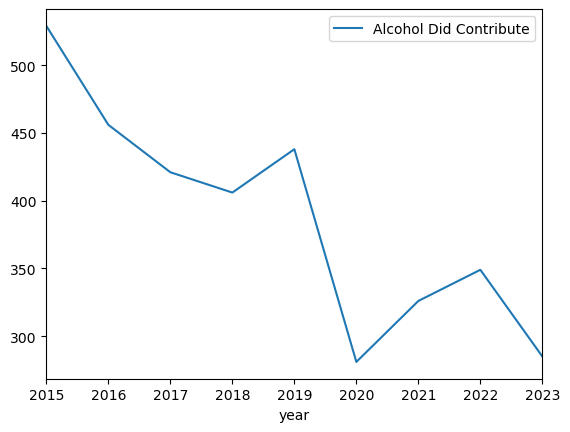

In [101]:
crashes_perYear.plot()

### Year over year the amount of alcohol related crashes has decreased since 2015. 2024 not included due to the fact that the year just started and the number of crashes is far lower than the rest. 

## Crashes Per Month

In [102]:
crashes4['month'] = crashes4['Date2'].dt.month
crashes4[:20]

,key_crash,City,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,Alcohol Did Not Contribute,Alcohol Did Contribute,Date2,year,month
Date,,,,,,,,,,,,,,,,,,,,
2011-05-30 21:55:00+00:00,46468,RALEIGH,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2011-05-30 21:55:00+00:00,2011,5
2011-08-12 14:39:00+00:00,50313,RALEIGH,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2011-08-12 14:39:00+00:00,2011,8
2011-08-20 21:12:00+00:00,50640,RALEIGH,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,10.0,1.0,2011-08-20 21:12:00+00:00,2011,8
2011-08-20 21:13:00+00:00,50793,RALEIGH,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2011-08-20 21:13:00+00:00,2011,8
2012-03-09 02:17:00+00:00,61979,RALEIGH,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2012-03-09 02:17:00+00:00,2012,3
2013-07-04 23:01:00+00:00,89372,RALEIGH,Thursday,July,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2013-07-04 23:01:00+00:00,2013,7
2013-09-30 00:54:00+00:00,94226,RALEIGH,Sunday,September,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2013-09-30 00:54:00+00:00,2013,9
2013-10-11 22:37:00+00:00,94972,RALEIGH,Friday,October,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2013-10-11 22:37:00+00:00,2013,10
2013-11-06 18:18:00+00:00,96644,RALEIGH,Wednesday,November,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2013-11-06 18:18:00+00:00,2013,11


In [103]:
crashes4 = crashes4.iloc[9:]
crashes4.head()

,key_crash,City,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,Alcohol Did Not Contribute,Alcohol Did Contribute,Date2,year,month
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01 10:27:00+00:00,121879,RALEIGH,Thursday,January,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,2015-01-01 10:27:00+00:00,2015,1
2015-01-01 10:32:00+00:00,121881,RALEIGH,Thursday,January,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2015-01-01 10:32:00+00:00,2015,1
2015-01-01 11:00:00+00:00,122206,RALEIGH,Thursday,January,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2015-01-01 11:00:00+00:00,2015,1
2015-01-01 11:42:00+00:00,121838,RALEIGH,Thursday,January,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2015-01-01 11:42:00+00:00,2015,1
2015-01-01 11:45:00+00:00,121851,RALEIGH,Thursday,January,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2015-01-01 11:45:00+00:00,2015,1


In [104]:
crashes_perMonth = pd.DataFrame({'month':crashes4['month'],'Alcohol Did Contribute':crashes4['Alcohol Did Contribute']})

In [105]:
crashes_perMonth.head()

,month,Alcohol Did Contribute
Date,,
2015-01-01 10:27:00+00:00,1,0.0
2015-01-01 10:32:00+00:00,1,1.0
2015-01-01 11:00:00+00:00,1,0.0
2015-01-01 11:42:00+00:00,1,0.0
2015-01-01 11:45:00+00:00,1,0.0


In [106]:
crashes_perMonth = crashes_perMonth.groupby('month').agg({'Alcohol Did Contribute':'sum'})

In [107]:
crashes_perMonth

,Alcohol Did Contribute
month,
1,331.0
2,313.0
3,292.0
4,309.0
5,312.0
6,245.0
7,278.0
8,285.0
9,262.0


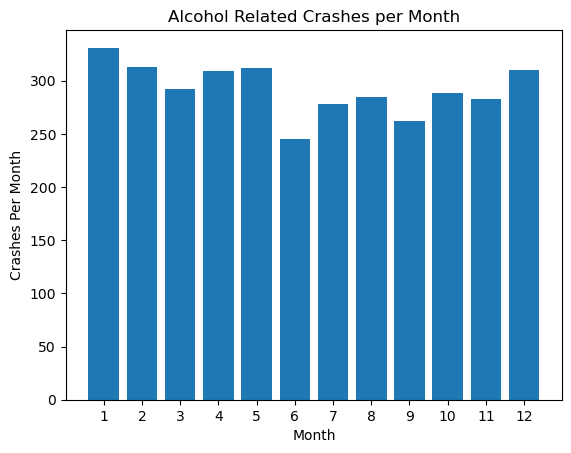

In [108]:
plt.bar(crashes_perMonth.index, crashes_perMonth['Alcohol Did Contribute'])
plt.xlabel('Month')
plt.ylabel('Crashes Per Month')
plt.title('Alcohol Related Crashes per Month')
plt.xticks(crashes_perMonth.index)
plt.show()

### The number of crashes does not vary by much from month to month. January has the highest amount of alcohol related crashes by 27 when combining all of the crashes from 2015 - 2023. February, April, May and December were the next 4 highest and all were within 5 crashes of each other. Thinking about the reasons behind these 5 months being the highest, you could probably assert that national holidays contribute to the amount of drunk driving accidents in the months with the highest totals. Each month has a widely popular national holiday, these being New Years, Valentine's Day, Easter, Cinco de Mayo, and Christmas. 

## Geospatial Analytics

In [109]:
# Using the Coordinate Reference System (CRS) 4326 to convert lat/long into a geometry
geom = gpd.points_from_xy(crashes3.Longitude, crashes3.Latitude, crs=4326)
type(geom)

geopandas.array.GeometryArray

In [110]:
# Create the GeoDataFrame
crashes4 = gpd.GeoDataFrame(crashes3,geometry=geom)
crashes4.head()

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute,geometry
135318,46468,2011-05-30 21:55:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - straight,Fixed object*,Local Street,T-intersection,Stop sign,Clear,Unknown,No,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.75100,-78.68200,2.0,0.0,POINT (-78.68200 35.75100)
163033,50313,2011-08-12 14:39:00+00:00,Outside Trafficway,RALEIGH,Parked Motor Vehicle,Angle,Public Vehicular Area,No Special Feature,No control present,Clear,Unknown,No,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.88100,-78.64600,2.0,0.0,POINT (-78.64600 35.88100)
168694,50640,2011-08-20 21:12:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,0.0,35.88030,-78.64584,10.0,1.0,POINT (-78.64584 35.88030)
168714,50793,2011-08-20 21:13:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.87903,-78.64572,2.0,1.0,POINT (-78.64572 35.87903)
196592,61979,2012-03-09 02:17:00+00:00,Shoulder,RALEIGH,Fixed object*,Fixed object*,Interstate,No Special Feature,No control present,Clear,Unknown,No,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.83510,-78.64500,2.0,1.0,POINT (-78.64500 35.83510)


<Axes: >

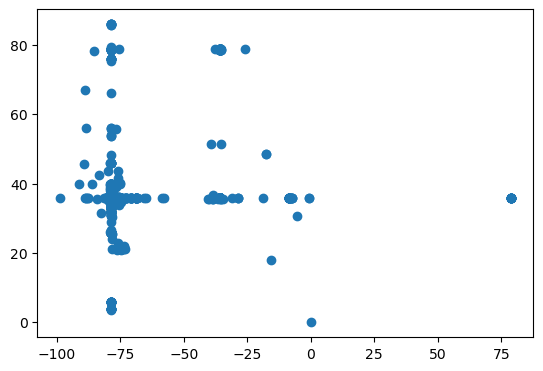

In [111]:
crashes4.plot()

<font color='red'>**NOTE:** Numerous Latitude/Longitude values are erroneous in the dataset. Too many to fix.</font>

<Axes: >

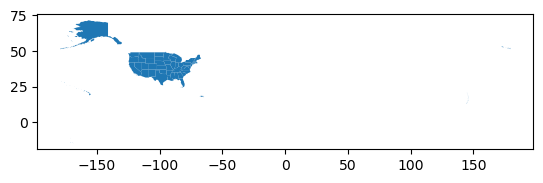

In [112]:
# Download file that contains the US states.
state_path = 'https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip'
states = gpd.read_file(state_path)
states.plot()

<Axes: >

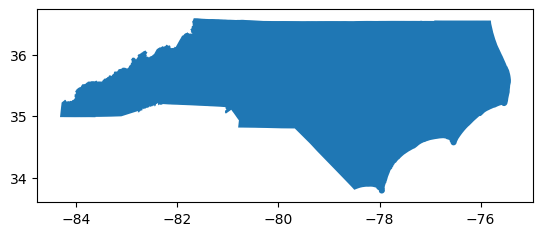

In [113]:
# Shapefile for NC
states[states.NAME == 'North Carolina'].plot()

In [114]:
# GEOID code for NC is 37
states[states.NAME == 'North Carolina']

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933327733,13456093195,+35.5397100,-079.1308636,"POLYGON ((-76.91598 36.54388, -76.91620 36.544..."


In [115]:
# Download the Census Tracts.
tract_path = 'https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_37_tract.zip'
NC_Tracts = gpd.read_file(tract_path)
NC_Tracts.shape

(2672, 13)

In [116]:
NC_Tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [117]:
# Convert CRS to 4326:
NC_Tracts = NC_Tracts.to_crs(4326)
NC_Tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

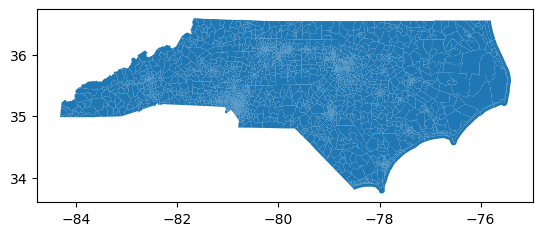

In [118]:
# Shapefile
NC_Tracts.plot()

<Axes: >

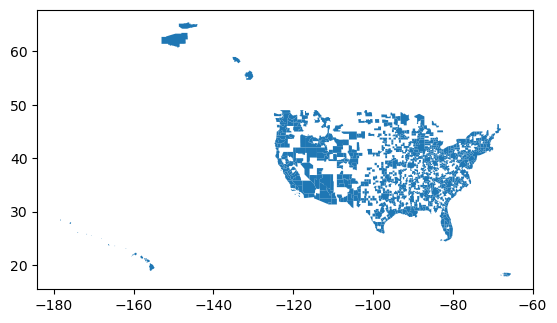

In [119]:
# Download the metro areas file.
metro_path = 'https://www2.census.gov/geo/tiger/TIGER2021/CBSA/tl_2021_us_cbsa.zip'
metro = gpd.read_file(metro_path)
metro.plot()

In [120]:
# Convert to 4326:
metro = metro.to_crs(4326)

<Axes: >

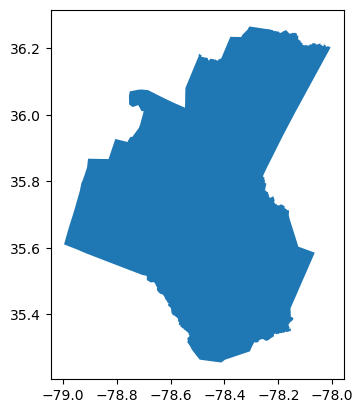

In [121]:
# Filter to Raleigh metro area
Raleigh = metro[metro.NAME.str.contains('Raleigh')].copy()
Raleigh.plot()

<Axes: >

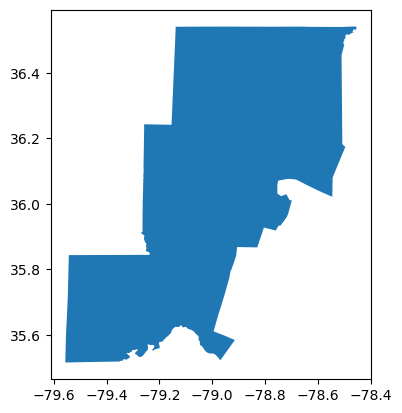

In [122]:
# Filter to Durham metro area
Durham = metro[metro.NAME.str.contains('Durham')].copy()
Durham.plot()

<Axes: >

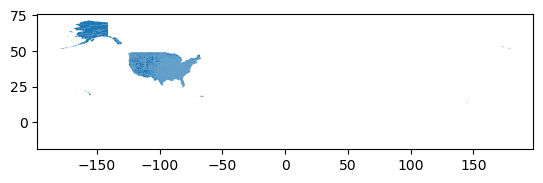

In [123]:
# Download the counties file.
county_path = 'https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip'
counties = gpd.read_file(county_path)
counties.plot()

In [124]:
# Convert CRS to 4326:
counties = counties.to_crs(4326)

<Axes: >

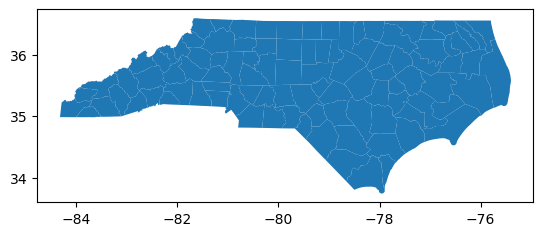

In [125]:
# Filter to only NC:
counties2 = counties[counties.STATEFP == '37']
counties2.plot()

<Axes: >

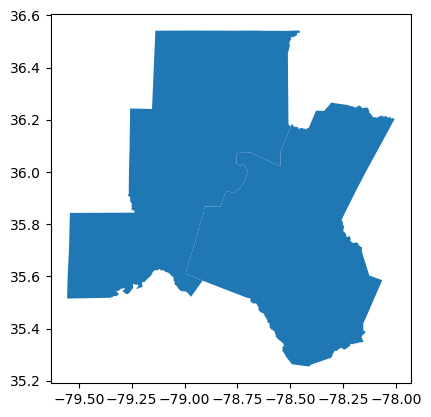

In [126]:
# Merge two metro areas, Durham and Raleigh, into a single GeoDataFrame 
combined_metro = gpd.GeoDataFrame(pd.concat([Durham, Raleigh], ignore_index=True))
combined_metro.plot()

<Axes: >

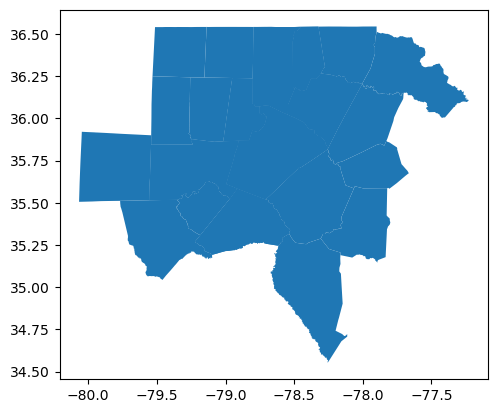

In [127]:
# Combine two shapefiles to find out which counties are in the Durham and Raleigh metro areas.
counties3 = gpd.sjoin(counties2, combined_metro)
counties3.plot()

<Axes: >

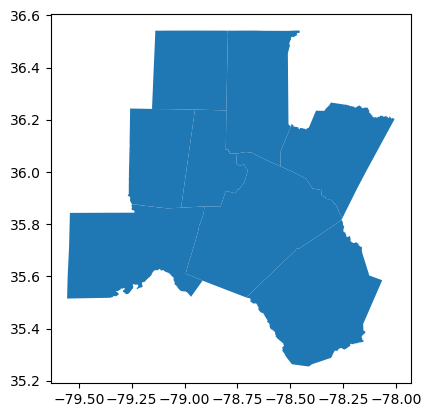

In [128]:
# Use parameter "within" to only include census tracts that are completely within the county.
counties3 = gpd.sjoin(counties2, combined_metro, predicate='within')
counties3.plot()

In [129]:
counties4 = counties3[['geometry']].copy()

In [130]:
# Join crashes with the county shapefile.
crashes5 = gpd.sjoin(crashes4, counties4)
crashes5.head()

,key_crash,Date,RelationToRoad,City,FirstHarmfulEvent,MostHarmfulEvent,RoadClassification,RoadFeature,TrafficControlType,WeatherCondition1,WeatherCondition2,WeatherContributedToCrash,Day_of_Week,Crash_Month,drivers,passengers,pedestrians,pedalcyclists,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,Latitude,Longitude,Alcohol Did Not Contribute,Alcohol Did Contribute,geometry,index_right
135318,46468,2011-05-30 21:55:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,Ran off road - straight,Fixed object*,Local Street,T-intersection,Stop sign,Clear,Unknown,No,Monday,May,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,35.75100,-78.68200,2.0,0.0,POINT (-78.68200 35.75100),2372
163033,50313,2011-08-12 14:39:00+00:00,Outside Trafficway,RALEIGH,Parked Motor Vehicle,Angle,Public Vehicular Area,No Special Feature,No control present,Clear,Unknown,No,Friday,August,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.88100,-78.64600,2.0,0.0,POINT (-78.64600 35.88100),2372
168694,50640,2011-08-20 21:12:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,0.0,35.88030,-78.64584,10.0,1.0,POINT (-78.64584 35.88030),2372
168714,50793,2011-08-20 21:13:00+00:00,On Roadway (Surface) / Off Roadway,RALEIGH,"Rear end, slow or stop","Rear end, slow or stop",Local Street,No Special Feature,No control present,Clear,Unknown,No,Saturday,August,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,35.87903,-78.64572,2.0,1.0,POINT (-78.64572 35.87903),2372
196592,61979,2012-03-09 02:17:00+00:00,Shoulder,RALEIGH,Fixed object*,Fixed object*,Interstate,No Special Feature,No control present,Clear,Unknown,No,Thursday,March,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.83510,-78.64500,2.0,1.0,POINT (-78.64500 35.83510),2372


In [131]:
crashes4.shape

(206030, 31)

In [132]:
crashes5.shape

(204267, 32)

<Axes: >

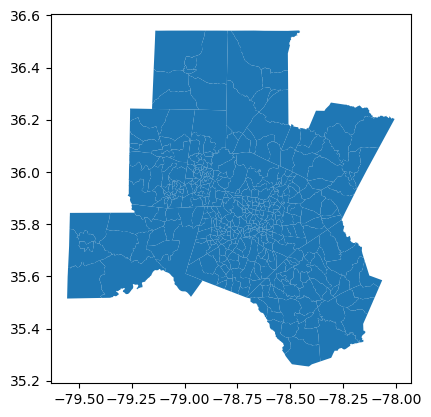

In [133]:
# Join the census tracts with Durham and Raleigh metro areas.
counties5 = gpd.sjoin(NC_Tracts,counties4, predicate='within')
counties5.plot()

In [134]:
# Remove columns keeping only geometry field in both GeoDataFrames, the GEOID in the census frame, 
# and Alcohol Did Contribute from crashes.
counties6 = counties5[['GEOID', 'geometry']].copy()
crashes6 = crashes5[['geometry', 'Alcohol Did Contribute']].copy()

In [135]:
# Left join the crashes onto the census tracts.
crashes_counties = gpd.sjoin(counties6, crashes6, how='left')
crashes_counties.head()

,GEOID,geometry,index_right,Alcohol Did Contribute
32,37037020703,"POLYGON ((-78.96592 35.81501, -78.96592 35.815...",6023.0,0.0
33,37037020201,"POLYGON ((-79.54429 35.78331, -79.54428 35.783...",NaN,NaN
34,37037020202,"POLYGON ((-79.37019 35.78086, -79.36982 35.783...",NaN,NaN
35,37037020107,"POLYGON ((-79.25096 35.87076, -79.25095 35.871...",NaN,NaN
36,37037020704,"POLYGON ((-79.02827 35.83897, -79.02827 35.839...",5596.0,0.0


In [136]:
counties6.shape

(450, 2)

In [137]:
crashes6.shape

(204267, 2)

In [138]:
crashes_counties.shape

(204456, 4)

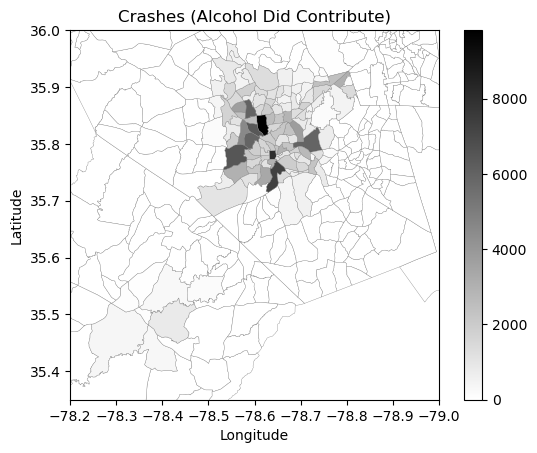

In [139]:
# Aggregate the GeoDataFrame by GEOID, counting the number of crashes.
dissolved_gdf = crashes_counties.dissolve(by='GEOID', aggfunc='count')
ax = dissolved_gdf.plot(column='Alcohol Did Contribute', cmap='binary', legend=True, 
                        edgecolor='grey', linewidth=0.25)
ax.set_xlim(-78.2, -79)
ax.set_ylim(35.35, 36)

plt.title("Crashes (Alcohol Did Contribute)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()